# Overview <a class="anchor" id="2"></a> 

# Data Preparation <a class="anchor" id="3"></a> 

## Loading Dataset

In [1]:
#Import all necessary libraries to processdata
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

import io
import requests
#import os, ssl

In [2]:
# set seed for reproducibility of results
np.random.seed(999)

#if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
#    getattr(ssl, '_create_unverified_context', None)): 
#    ssl._create_default_https_context = ssl._create_unverified_context

#Read & check shape of data
dataset_url = 'train.csv'

dataset = pd.read_csv(dataset_url, index_col="ID")

print(dataset.shape)

dataset.columns.values

(2071, 23)


array(['TARGET_LifeExpectancy', 'Country', 'Year', 'Status',
       'AdultMortality', 'AdultMortality-Male', 'AdultMortality-Female',
       'InfantDeaths', 'Alcohol', 'PercentageExpenditure', 'Measles',
       'BMI', 'UnderFiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIV-AIDS', 'GDP', 'Population', 'Thinness1-19years',
       'Thinness5-9years', 'IncomeCompositionOfResources', 'Schooling'],
      dtype=object)

## Checking for Missing Values

Let's make sure we do not have any missing values.

In [3]:
dataset.isna().sum()

TARGET_LifeExpectancy           0
Country                         0
Year                            0
Status                          0
AdultMortality                  0
AdultMortality-Male             0
AdultMortality-Female           0
InfantDeaths                    0
Alcohol                         0
PercentageExpenditure           0
Measles                         0
BMI                             0
UnderFiveDeaths                 0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV-AIDS                        0
GDP                             0
Population                      0
Thinness1-19years               0
Thinness5-9years                0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64

Let's have a look at 5 randomly selected rows in this raw dataset.

In [4]:
dataset.sample(n=5, random_state=999)

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
ID,,,,,,,,,,,,,,,,,,,,,
1131,80.8,68,2008,1,229,220,238,0,12.70,116.504961,...,94,6.20,94.0,0.1,1035.60,326999,3.0,3.0,0.807,4.049691
1886,62.5,147,2010,0,235,234,236,6,2.40,34.239794,...,96,1.93,96.0,0.1,441.80,4935762,3.2,3.3,0.000,3.240370
810,75.7,122,2009,0,16,14,18,5,3.16,222.482334,...,94,7.89,94.0,0.7,1783.68,777972,2.4,2.3,0.590,3.301515
268,67.8,39,2006,0,17,18,16,81,6.85,186.609049,...,99,7.70,99.0,0.1,4058.29,184738458,3.2,3.2,0.695,3.741657
1591,69.6,183,2017,0,19,18,20,0,5.07,0.000000,...,96,7.44,96.0,0.2,1819.60,195553,5.5,5.3,0.565,3.346640


## Summary Statistics

The summary statistics for the full data are shown below.

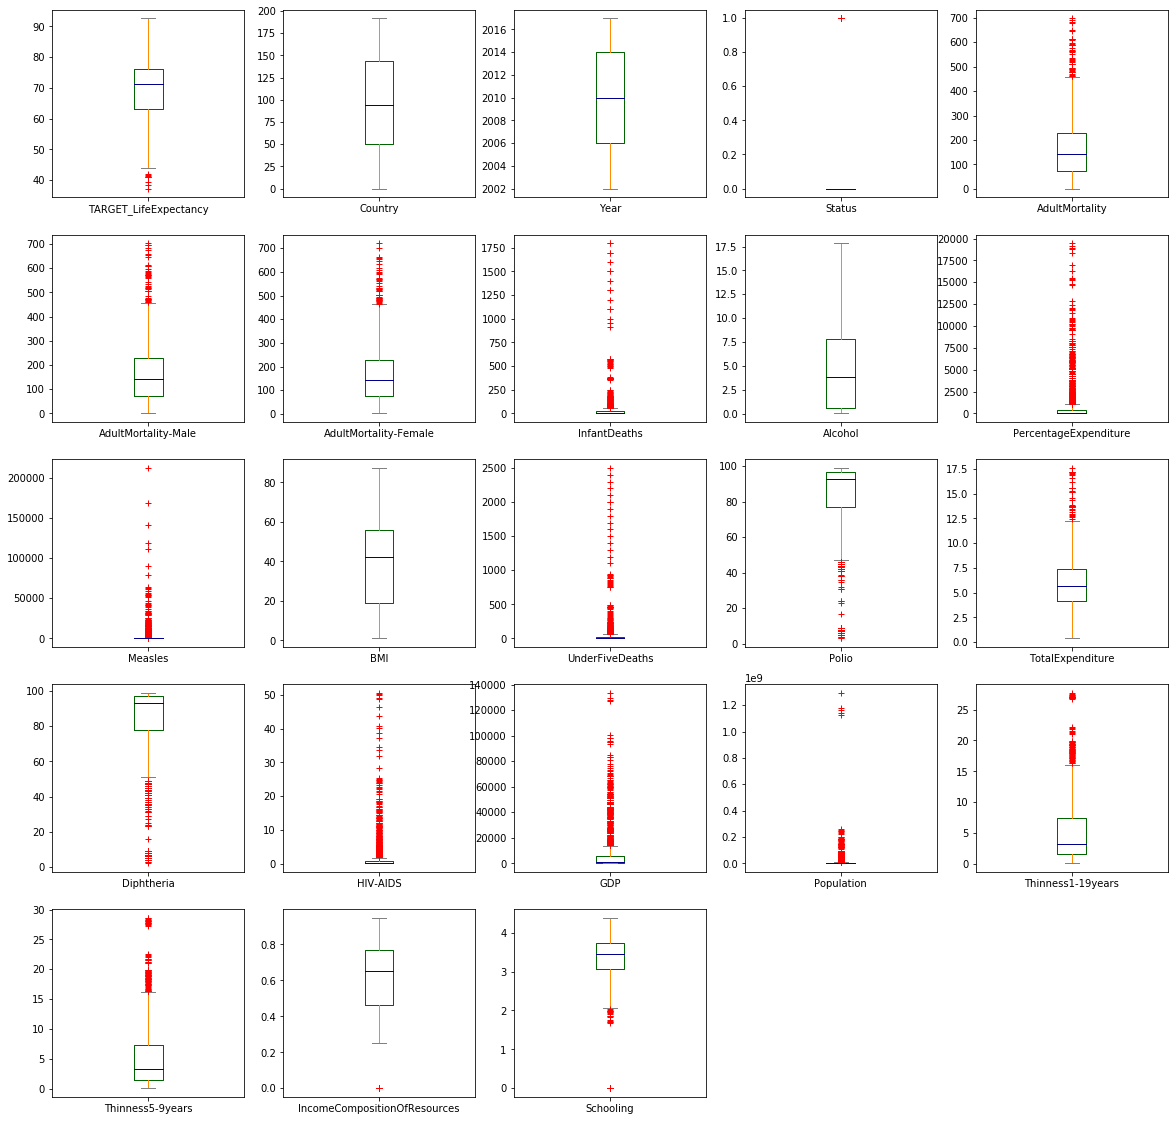

In [5]:
# check the distribution of attributes/features 

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

dataset.plot(kind='box', subplots=True, layout=(5,5),
sharex=False, sharey=False, figsize=(20,20), color=color, sym='r+')
plt.show()

As can be seen, many attribtes have outliers.Effect of these outliers will be handled seperately by individual algorithms.

In [6]:
#summary statistcs of dataset
dataset.describe(include='all')

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,764.540216,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,2081.880374,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,5.848550,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,69.020425,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,430.190047,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,19479.911610,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


## Check for Multicollinearity

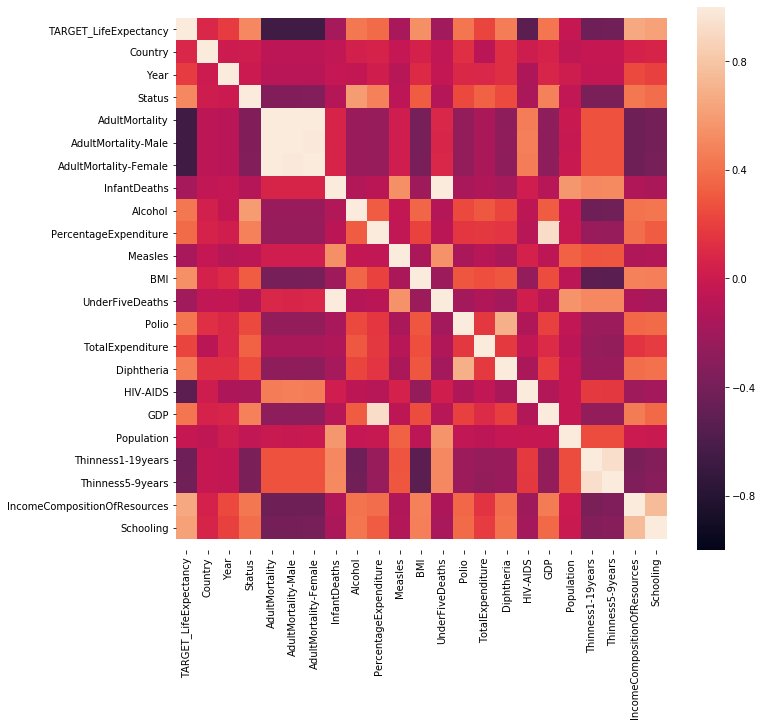

In [7]:
# plot the features to check the existence of multicollinearity
correlations = dataset.corr()
f, ax = plt.subplots(figsize=(11,10))
sns.heatmap(correlations, vmin=-1, vmax=1)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

## Spliting Target Attribute & Predictors

In [8]:
Data = dataset.drop(columns=['TARGET_LifeExpectancy'])
target = dataset['TARGET_LifeExpectancy']

In [9]:
Data.columns

Index(['Country', 'Year', 'Status', 'AdultMortality', 'AdultMortality-Male',
       'AdultMortality-Female', 'InfantDeaths', 'Alcohol',
       'PercentageExpenditure', 'Measles', 'BMI', 'UnderFiveDeaths', 'Polio',
       'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP', 'Population',
       'Thinness1-19years', 'Thinness5-9years', 'IncomeCompositionOfResources',
       'Schooling'],
      dtype='object')

## Scaling of Features

We perform a min-max scaling of the descriptive features. But first we make a copy of the Data to keep track of column names.

In [10]:
from sklearn import preprocessing

Data_df = Data.copy()

#MinMaxScaler()
Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

Data = pd.DataFrame(Data, columns=Data_df.columns)

In [11]:
pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)

,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
1130,0.354167,0.400000,1.0,0.326648,0.312500,0.327778,0.000000,0.710526,0.005981,0.000005,...,0.947917,0.338363,0.948454,0.000000,0.007745,0.000253,0.105072,0.101754,0.851266,0.924211
1885,0.765625,0.533333,0.0,0.335244,0.332386,0.325000,0.003333,0.133819,0.001758,0.000000,...,0.968750,0.090540,0.969072,0.000000,0.003296,0.003815,0.112319,0.112281,0.000000,0.739510
809,0.635417,0.466667,0.0,0.021490,0.019886,0.022222,0.002778,0.176372,0.011421,0.000000,...,0.947917,0.436448,0.948454,0.011881,0.013350,0.000601,0.083333,0.077193,0.622363,0.753464
267,0.203125,0.266667,0.0,0.022923,0.025568,0.019444,0.045000,0.382979,0.009580,0.000000,...,1.000000,0.425421,1.000000,0.000000,0.030392,0.142781,0.112319,0.108772,0.733122,0.853913
1590,0.953125,1.000000,0.0,0.025788,0.025568,0.025000,0.000000,0.283315,0.000000,0.000000,...,0.968750,0.410331,0.969072,0.001980,0.013619,0.000151,0.195652,0.182456,0.595992,0.763763


## Train-Test Splitting

In [12]:
#split data into 80-20 part of training & testing dataset
from sklearn.model_selection import train_test_split

Data_sample_train, Data_sample_test, \
target_sample_train, target_sample_test = train_test_split(Data, target, 
                                                    test_size = 0.2, random_state=787)

print(Data_sample_train.shape)
print(Data_sample_test.shape)
print(target_sample_train.shape)
print(target_sample_test.shape)

(1656, 22)
(415, 22)
(1656,)
(415,)


## Model Evaluation Strategy & Hyperparameter Tuning <a class="anchor" id="4"></a>

## Linear Regression

In [13]:
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# cv_method = StratifiedKFold(n_splits=5, random_state=999)

#train Linear regression model
from sklearn import linear_model
linReg = linear_model.LinearRegression()

linReg.fit(Data_sample_train, target_sample_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#display intercept & coefficient
print(linReg.intercept_)
print(linReg.coef_)

55.18021471847015
[   0.66372548    0.90094718    2.31669738   -4.96459879   -5.87269931
   -3.88361054  158.70938713    3.72645275    2.47116852   -2.78066888
    2.90127424 -164.08058231    1.94957418   -0.55209722    2.71637286
  -25.62073517    3.86759061   -1.3170624    -1.36206504   -1.6371785
    6.25884407    9.6725854 ]


In [15]:
#predict value
predYRm = linReg.predict(Data_sample_test)

In [16]:
#evaluation measure
from sklearn.metrics import mean_squared_error
print('Mean squared error For Linear Regression:', mean_squared_error(target_sample_test, predYRm))
print('R2 Score For Linear Regression:',r2_score(target_sample_test, predYRm))

Mean squared error For Linear Regression: 22.530350559273952
R2 Score For Linear Regression: 0.7483888468572661


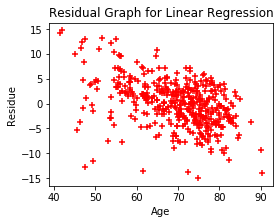

In [17]:
#Residue Plot

fig, ax = plt.subplots(figsize=(4, 3))

ax.scatter(target_sample_test, predYRm - target_sample_test, s=30, c='red', marker='+', zorder=10)
plt.title('Residual Graph for Linear Regression')
plt.xlabel('Age')
plt.ylabel('Residue');

## Polynomial Regression

In [18]:
# Create a polynomial regression of degree 2
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=2, include_bias=True)
polyTrainX = polyFeat.fit_transform(Data_sample_train)
polyTestX = polyFeat.fit_transform(Data_sample_test)

linRegPoly = linear_model.LinearRegression()
linRegPoly.fit(polyTrainX, target_sample_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#display intercept & coefficient
print(linRegPoly.intercept_)
print(linRegPoly.coef_)

39.94716201266229
[-3.37615032e-10  1.72913422e+01  3.75159280e+00 -4.28908828e+10
 -2.48840857e+11  1.25489945e+11  1.28341990e+11 -6.41314353e+02
  2.62833684e+01  1.05075594e+02 -1.13201780e+01  1.29216576e+01
  6.82764559e+02  2.25446320e+00 -3.01081657e+00  1.11027184e+01
 -1.05402832e+02 -9.42248135e+01  5.89456444e+01 -8.71634388e+00
 -2.53029909e+01  3.93820190e+00  1.43346472e+01 -1.93315125e+00
  2.93525314e+00  2.58311272e+00 -3.64445601e+11  1.83789186e+11
  1.87966212e+11 -5.78206268e+02 -1.86437988e+00 -3.80359364e+00
  9.18885259e+01 -4.72837448e+00  6.38893478e+02 -4.11464691e-01
  6.16602707e+00 -3.19932175e+00 -3.30553436e+00  2.72129631e+00
  3.17132950e+00  4.75605965e+01 -6.42552052e+01  3.16484833e+00
 -1.74317780e+01 -9.25205231e-01  1.57108974e+00  1.43594572e+12
 -7.24144547e+11 -7.40602378e+11 -3.44609888e+02  2.38783932e+00
 -2.31438911e+00  4.53885210e+01 -1.62734222e+00  4.03826772e+02
 -6.34971619e-01  1.03916855e+01  1.57573700e+00  2.28581448e+01
 -1.114

In [20]:
#predict value
predYRm = linRegPoly.predict(polyTestX)

In [21]:
#evaluation measure
from sklearn.metrics import mean_squared_error
print('Mean squared error For Polynomial:', mean_squared_error(target_sample_test, predYRm))
print('R2 Score For Polynomial:',r2_score(target_sample_test, predYRm))

Mean squared error For Polynomial: 15.1090428646598
R2 Score For Polynomial: 0.8312674413095081


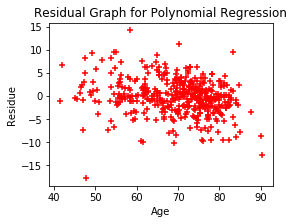

In [22]:
#Residue Plot

fig, ax = plt.subplots(figsize=(4, 3))

ax.scatter(target_sample_test, predYRm - target_sample_test, s=30, c='red', marker='+', zorder=10)
plt.title('Residual Graph for Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Residue');

In [23]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,GridSearchCV
from sklearn import metrics

#ElasticNet
#Lasso
#train Ridge regression model
linRegRidge = linear_model.Ridge()

In [24]:
#parametrs combination for GridSearch
params_pipe_Ridge = {'alpha' : [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5e-2,5e-3,5e-1,5,10]}

In [25]:
#GridSearch with cross-validation
gs_pipe_Ridge = GridSearchCV(estimator=linRegRidge, 
                           param_grid=params_pipe_Ridge, 
                           cv=10,
                           refit=True,
                           n_jobs=-2,
                           scoring='neg_mean_squared_error',
                           verbose=1) 

In [26]:
#fit all model combinations
gs_pipe_Ridge.fit(Data_sample_train, target_sample_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-2)]: Done  99 out of 120 | elapsed:    3.9s remaining:    0.7s
[Parallel(n_jobs=-2)]: Done 120 out of 120 | elapsed:    3.9s finished
C:\Users\viran\Anaconda3\envs\Py3.6\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-2,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   0.05, 0.005, 0.5, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
#best fitted model
linRegRidge = gs_pipe_Ridge.best_estimator_

In [28]:
print(gs_pipe_Ridge.best_score_)
print(gs_pipe_Ridge.best_params_)

#predict value
predYRm = linRegRidge.predict(Data_sample_test)

-22.30030680952653
{'alpha': 0.001}


In [29]:
#evaluation measure
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error For Ridge:', mean_squared_error(target_sample_test, predYRm))
print('R2 Score For Ridge:',r2_score(target_sample_test, predYRm))
#linRegRidge.score(Data_sample_test,target_sample_test)

Mean squared error For Ridge: 22.5512973576007
R2 Score For Ridge: 0.7481549202670972


## Ridge Regression with Polynomial

In [30]:
linRegRidgePoly = linear_model.Ridge(alpha=0.05)

#parametrs combination for GridSearch
params_pipe_RidgePoly = {'alpha' : [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,5e-2,5e-3,5e-1,1,5,10,15,20,30,40]}

#GridSearch with cross-validation
gs_pipe_RidgePoly = GridSearchCV(estimator=linRegRidgePoly, 
                           param_grid=params_pipe_RidgePoly, 
                           cv=10,
                           refit=True,
                           n_jobs=-2,
                           scoring='neg_mean_squared_error',
                           verbose=1) 

In [31]:
#fit all model combinations
gs_pipe_RidgePoly.fit(polyTrainX, target_sample_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 160 out of 160 | elapsed:    0.8s finished
C:\Users\viran\Anaconda3\envs\Py3.6\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=0.05, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-2,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01,
                                   0.05, 0.005, 0.5, 1, 5, 10, 15, 20, 30,
                                   40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [32]:
#best fitted model
linRegRidgePoly = gs_pipe_RidgePoly.best_estimator_

In [33]:
print(gs_pipe_RidgePoly.best_score_)
print(gs_pipe_RidgePoly.best_params_)

#predict value
predYRm = linRegRidgePoly.predict(polyTestX)

-12.9985851730428
{'alpha': 0.05}


In [34]:
#evaluation measure
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error For Ridge with Polynomial:', mean_squared_error(target_sample_test, predYRm))
print('R2 Score For Ridge with Polynomial:',r2_score(target_sample_test, predYRm))

Mean squared error For Ridge with Polynomial: 12.961223660963297
R2 Score For Ridge with Polynomial: 0.8552535424206487


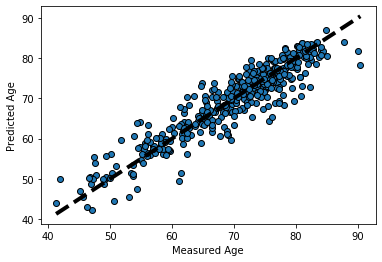

In [35]:
#Scatter plot of Actual vs. Predicted value on test data
fig, ax = plt.subplots()
ax.scatter(target_sample_test, predYRm, edgecolors=(0, 0, 0))
ax.plot([target_sample_test.min(), target_sample_test.max()], [target_sample_test.min(), target_sample_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured Age')
ax.set_ylabel('Predicted Age')
plt.show()

**Ultimate Judgement :- Polynomial Ridge Reegression is our ultimate model**

## Prediction on unseen Test data

In [36]:
#load test dataset
Data_Test = pd.read_csv("test.csv")
Data_Test.head()

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,120,2017,0,335,314,356,66,6.35,0.000000,...,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
1,2,120,2016,0,348,338,358,67,8.33,23.965612,...,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
2,3,120,2015,0,355,362,348,69,8.10,35.958573,...,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389
3,4,120,2014,0,358,348,368,72,8.24,256.122524,...,75.0,3.30,75,2.6,5150.04,259615.0,8.8,8.6,0.508,3.209361
4,5,120,2013,0,361,368,354,75,8.06,239.891392,...,73.0,3.38,71,2.5,4815.02,24218565.0,8.9,8.8,0.495,3.065942


In [37]:
Data_df_Test = Data_Test.iloc[:,1:]

#MinMaxScaler()
Data_scaler_Test = preprocessing.MinMaxScaler()
Data_scaler_Test.fit(Data_df_Test)
Data_Test_New = Data_scaler_Test.fit_transform(Data_df_Test)

Data_Test_New = pd.DataFrame(Data_Test_New, columns=Data_df_Test.columns)

Data_Test_New.head()

,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,0.626316,1.000000,0.0,0.462604,0.423181,0.456186,0.134694,0.480667,0.000000,0.000647,...,0.041667,0.254920,0.635417,0.041475,0.041690,0.051449,0.506173,0.426316,0.566702,0.742108
1,0.626316,0.933333,0.0,0.480609,0.455526,0.458763,0.136735,0.630781,0.002042,0.064109,...,0.677083,0.205248,0.635417,0.043779,0.005371,0.049723,0.518519,0.431579,0.562433,0.742108
2,0.626316,0.866667,0.0,0.490305,0.487871,0.445876,0.140816,0.613343,0.003064,0.046705,...,0.666667,0.294283,0.770833,0.050691,0.005430,0.048012,0.524691,0.442105,0.558164,0.742108
3,0.626316,0.800000,0.0,0.494460,0.469003,0.471649,0.146939,0.623958,0.021826,0.024429,...,0.750000,0.204311,0.750000,0.057604,0.051880,0.004792,0.537037,0.447368,0.542156,0.705397
4,0.626316,0.733333,0.0,0.498615,0.495957,0.453608,0.153061,0.610311,0.020443,0.007940,...,0.729167,0.211809,0.708333,0.055300,0.048503,0.447275,0.543210,0.457895,0.528282,0.673874


In [38]:
#transform for polynomial
polyTestXFeat = polyFeat.fit_transform(Data_Test_New)

In [39]:
#predict values
Predicted_target = linRegRidgePoly.predict(polyTestXFeat)
Predicted_target

array([57.98281464, 54.53276702, 54.09076036, 53.86378786, 50.95890682,
       49.52150611, 52.22256348, 52.29602789, 52.93354251, 51.89426417,
       50.90555573, 56.68870109, 58.76981009, 53.83590066, 54.73771123,
       56.63830832, 77.9932491 , 75.65750889, 71.28040844, 70.94322029,
       74.20672204, 76.10023816, 76.74926173, 76.01573651, 77.08927575,
       77.26133281, 76.05979173, 78.21583395, 77.13349826, 74.5142116 ,
       75.87420875, 72.53440727, 69.38280853, 63.12743841, 67.05747345,
       61.53394818, 70.93150854, 62.51440944, 60.04461628, 70.05699713,
       70.45755634, 69.7319352 , 70.47331791, 70.20746455, 69.08298436,
       71.75732313, 68.33208582, 66.03075915, 75.23869317, 76.72446944,
       75.18072007, 74.98738903, 74.67941264, 74.29845083, 76.49830911,
       75.19698653, 72.68163289, 72.80102985, 72.90059854, 72.51777219,
       71.65039173, 73.64708805, 71.08997604, 76.11375024, 72.86591305,
       73.1040533 , 72.37145374, 72.87277087, 71.64288991, 74.59

In [40]:
# store the values in a data frame
df = pd.DataFrame({'ID':Data_Test['ID'], 'TARGET_LifeExpectancy':Predicted_target})
df.to_csv("s3715555.csv", index=False)

In [41]:
#summary of predicted data
df.describe()

,ID,TARGET_LifeExpectancy
count,867.000000,867.000000
mean,434.000000,67.425946
std,250.425638,10.801169
min,1.000000,25.076145
25%,217.500000,60.736261
50%,434.000000,70.614217
75%,650.500000,75.018991
max,867.000000,86.740912


In [52]:
#df[df['TARGET_LifeExpectancy'] > 38]